# Base Model

In [39]:
import cobra
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [40]:
cerevisiae = cobra.io.load_json_model('./modelos COBRA/iMM904.json')
cerevisiae

Name,iMM904
Memory address,0x0ef71c77e48
Number of metabolites,1226
Number of reactions,1577
Objective expression,-1.0*BIOMASS_SC5_notrace_reverse_93090 + 1.0*BIOMASS_SC5_notrace
Compartments,"cytosol, mitochondria, extracellular space, peroxisome/glyoxysome, endoplasmic reticulum, vacuole, nucleus, golgi apparatus"


In [41]:
print("Reactions")
print("---------")
for x in cerevisiae.reactions:
    print("%s : %s \n lower: %s, upper: %s" % (x.id, x.reaction, x.lower_bound, x.upper_bound))

Reactions
---------
13BGH : 13BDglcn_c + h2o_c --> glc__D_c 
 lower: 0.0, upper: 999999.0
13BGHe : 13BDglcn_e + h2o_e --> glc__D_e 
 lower: 0.0, upper: 999999.0
13GS : udpg_c --> 13BDglcn_c + h_c + udp_c 
 lower: 0.0, upper: 999999.0
16GS : udpg_c --> 16BDglcn_c + h_c + udp_c 
 lower: 0.0, upper: 999999.0
23CAPPD : 23camp_c + h2o_c + h_c --> amp2p_c 
 lower: 0.0, upper: 999999.0
2DDA7Ptm : 2dda7p_c <=> 2dda7p_m 
 lower: -999999.0, upper: 999999.0
2DHPtm : 2dhp_c <=> 2dhp_m 
 lower: -999999.0, upper: 999999.0
2DOXG6PP : 2doxg6p_c + h2o_c --> 2dglc_c + pi_c 
 lower: 0.0, upper: 999999.0
2HBO : 2hb_c + nad_c <=> 2obut_c + h_c + nadh_c 
 lower: -999999.0, upper: 999999.0
2HBt2 : 2hb_e + h_e <=> 2hb_c + h_c 
 lower: -999999.0, upper: 999999.0
2HMHMBQMTm : 2hpmhmbq_m + amet_m --> ahcys_m + h_m + q6_m 
 lower: 0.0, upper: 999999.0
2HP6MPMOm : 2hp6mp_m + o2_m --> 2hp6mbq_m + h2o_m 
 lower: 0.0, upper: 999999.0
2HPMBQMTm : 2hp6mbq_m + amet_m --> 2hpmmbq_m + ahcys_m + h_m 
 lower: 0.0, upper: 99

In [42]:
print("Metabolites")
print("-----------")
for x in cerevisiae.metabolites:
    print('%9s : %s' % (x.id, x.formula))

Metabolites
-----------
 10fthf_c : C20H21N7O7
 10fthf_m : C20H21N7O7
12dgr_SC_c : C3540H6644O500
13BDglcn_c : C6H10O5
13BDglcn_e : C6H10O5
13dampp_c : C3H12N2
  13dpg_c : C3H4O10P2
 14glun_c : C6H12O6
16BDglcn_c : C6H10O5
 1Dgali_c : C12H22O11
1ag3p_SC_c : C1920H3622O700P100
1agly3p_SC_c : C1920H3422O700P100
1agpc_SC_c : C2420H4922N100O700P100
 1mncam_c : C7H9N2O
 1p3h5c_c : C5H6NO3
 1p3h5c_m : C5H6NO3
 1pyr5c_c : C5H6NO2
 1pyr5c_m : C5H6NO2
 23camp_c : C10H11N5O6P
 23dhmb_m : C5H9O4
 23dhmp_m : C6H11O4
  23dpg_c : C3H3O10P2
 25aics_c : C13H15N4O12P
 25dhpp_c : C9H14N5O8P
25dthpp_c : C9H16N5O8P
 2ahbut_m : C6H9O4
 2ahhmd_m : C7H8N5O8P2
 2ahhmp_m : C7H9N5O2
  2amsa_c : C3H5NO3
 2aobut_c : C4H7NO3
 2cpr5p_c : C12H13NO9P
 2dda7p_c : C7H10O10P
 2dda7p_m : C7H10O10P
  2dglc_c : C6H12O5
   2dhp_c : C6H9O4
   2dhp_m : C6H9O4
2doxg6p_c : C6H11O8P
  2dr1p_c : C5H9O7P
  2dr5p_c : C5H9O7P
    2hb_c : C4H7O3
    2hb_e : C4H7O3
2hhxdal_c : C16H32O2
2hp6mbq_m : C37H54O3
 2hp6mp_m : C37H56O2
2hpmhmb

In [43]:
print("Genes")
print("-----")
for x in cerevisiae.genes:
    associated_ids = (i.id for i in x.reactions)
    print("%s is associated with reactions: %s" %
          (x.id, "{" + ", ".join(associated_ids) + "}"))

Genes
-----
YGR282C is associated with reactions: {13BGH}
YOR190W is associated with reactions: {13BGHe}
YLR300W is associated with reactions: {13BGHe}
YDR261C is associated with reactions: {13BGHe}
YMR306W is associated with reactions: {13GS}
YLR342W is associated with reactions: {13GS}
YMR215W is associated with reactions: {13GS}
YMR307W is associated with reactions: {13GS}
YCR034W is associated with reactions: {FAS240_L, FAS260, 13GS}
YOL132W is associated with reactions: {13GS}
YOL030W is associated with reactions: {13GS}
YGR032W is associated with reactions: {13GS}
YLR343W is associated with reactions: {13GS}
YGR143W is associated with reactions: {16GS}
YPR159W is associated with reactions: {16GS}
YGR247W is associated with reactions: {23CAPPD}
YHR043C is associated with reactions: {2DOXG6PP}
YHR044C is associated with reactions: {2DOXG6PP}
YOR125C is associated with reactions: {2HPMMBQMOm, 2HPMBQMTm, 3DH5HPBMTm, 2HP6MPMOm, 2HMHMBQMTm}
YLR201C is associated with reactions: {2HPMMB

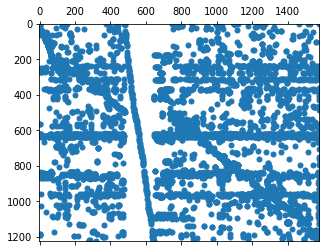

In [44]:
S = cobra.util.array.create_stoichiometric_matrix(cerevisiae)
plt.spy(S, marker='.')
plt.show()

In [81]:
cerevisiaeDF = pd.DataFrame(S)

colNames = [x.reaction for x in cerevisiae.reactions]
rowNames = [x.formula for x in cerevisiae.metabolites]

cerevisiaeDF.columns = colNames

cerevisiaeDF['metabolites'] = rowNames
cerevisiaeDF = cerevisiaeDF.set_index('metabolites')

In [80]:
cerevisiaeDF.to_csv('./modelos COBRA/cerevisiae.csv', sep=',')